In [1]:
#Packages for Twitter data downloading
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen
import os
import tweepy as tw
import pandas as pd
import re
import time
import datetime
from datetime import datetime

#Packages for text processing
import en_core_web_sm
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

#Data Source
import yfinance as yf

#Data Visualization
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import requests
import os
import json
import dateutil.parser
import unicodedata
import dateutil.parser
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

#Modeling using Catboost
from catboost import CatBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
import skforecast
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

In [2]:
consumer_key= 'your consumer_key'
consumer_secret= 'your consumer_secret'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth)

In [5]:
os.environ['TOKEN'] = ''

In [6]:
def auth():
    return os.getenv('TOKEN')

In [7]:
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [11]:
def create_url(keyword, start_date, end_date, max_results = 10):
    search_url = "https://api.twitter.com/2/tweets/search/recent"
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

In [12]:
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [13]:
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "xbox lang:eng"
max_results = 100
start_time = "2022-04-04T14:30:00.000Z"
key_word = 'Berkshire Hathaway'

In [15]:
def current_time(end):
    end_time = end
    return (end_time)

In [16]:
def json(end):
    url = create_url(key_word, start_time,current_time(end), max_results)
    json_response = connect_to_endpoint(url[0], headers, url[1])
    return json_response

In [17]:
def create_df(end):
    list_of_lists = []
    json_response = json(end)
    for i in range(0,len(json_response['data'])):
        list_of_lists.append([json_response['data'][i]['created_at'], json_response['data'][i]['public_metrics'].get('retweet_count'), json_response['data'][i]['public_metrics'].get('reply_count'), json_response['data'][i]['public_metrics'].get('like_count'), json_response['data'][i]['public_metrics'].get('quote_count'), json_response['data'][i]['text']])
    
    df_temporary = pd.DataFrame(list_of_lists, columns=['created_at', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'text'])
    end = df_temporary['created_at'].iloc[-1]
    return df_temporary, end;

In [ ]:
end = "2022-04-05T09:00:00.000Z"
df1, end = create_df(end)
q=0
dataframes_list = []

while(q<500):
    df2, end = create_df(end)
    dataframes_list.append(df2)
    q+=1

In [79]:
df_monday = pd.concat(dataframes_list)

In [17]:
df_ = []
frames = [df_monday, df_thuesday, df_wednesday, df_thursday, df_friday]
df_ = pd.concat(frames)

In [24]:
df_.index = list(range(0, len(df_)))

,created_at,retweet_count,reply_count,like_count,quote_count,text
0,2022-04-04T20:59:11.000Z,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...
1,2022-04-04T20:58:39.000Z,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...
2,2022-04-04T20:56:59.000Z,2797,0,0,0,RT @Legit_airdropz: New airdrop: ⭕️Crypto's “B...
3,2022-04-04T20:56:54.000Z,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...
4,2022-04-04T20:56:45.000Z,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...
...,...,...,...,...,...,...
846,2022-04-01T14:49:05.000Z,0,0,0,0,Check out this property just listed in 32960\n...
847,2022-04-01T14:39:29.000Z,1,0,0,0,RT @LaMonicaBuzz: Some 4/1 humor in a report f...
848,2022-04-01T14:39:10.000Z,2797,0,0,0,RT @Legit_airdropz: New airdrop: ⭕️Crypto's “B...
849,2022-04-01T14:32:42.000Z,0,0,0,0,Berkshire Hathaway HomeServices Simon &amp; Sa...


In [25]:
datasettime = []

for i in range(0,len(df_)):
    orig_time=df_['created_at'].iloc[i][:-5]
    d = datetime.datetime.strptime(orig_time, '%Y-%m-%dT%H:%M:%S')
    datasettime.append(d)

datasettime = pd.DataFrame(datasettime)

datasettime.rename(
    columns={0:"time_stamp"}
          ,inplace=True)

,time_stamp
0,2022-04-04 20:59:11
1,2022-04-04 20:58:39
2,2022-04-04 20:56:59
3,2022-04-04 20:56:54
4,2022-04-04 20:56:45
...,...
846,2022-04-01 14:49:05
847,2022-04-01 14:39:29
848,2022-04-01 14:39:10
849,2022-04-01 14:32:42


In [28]:
df_ = pd.concat([df_, datasettime], axis=1)
df_ = df_.drop('created_at', axis=1)

In [30]:
df_['time_stamp'] = pd.DataFrame(df_['time_stamp'].dt.strftime('%Y-%m-%d %H:%M'))

In [32]:
df_ = df_.drop_duplicates(subset=['time_stamp'], keep='last')

,retweet_count,reply_count,like_count,quote_count,text,time_stamp
0,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...,2022-04-04 20:59
1,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...,2022-04-04 20:58
4,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...,2022-04-04 20:56
5,388,0,0,0,RT @BetteMidler: Take a look at the subsidies ...,2022-04-04 20:55
7,2797,0,0,0,RT @Legit_airdropz: New airdrop: ⭕️Crypto's “B...,2022-04-04 20:54
...,...,...,...,...,...,...
845,1,0,0,0,RT @CanDivStocks: @MillennialMojo @dividend_sn...,2022-04-01 14:50
846,0,0,0,0,Check out this property just listed in 32960\n...,2022-04-01 14:49
848,2797,0,0,0,RT @Legit_airdropz: New airdrop: ⭕️Crypto's “B...,2022-04-01 14:39
849,0,0,0,0,Berkshire Hathaway HomeServices Simon &amp; Sa...,2022-04-01 14:32


In [33]:
df_ = df_.sort_values(by=['time_stamp'])

In [38]:
#We would like to clean the tweets, remove all the unwanted symbols
def clean_text(df_, text):
    df_[text]=df_[text].apply(str)
    df_[text] = df_[text].str.lower()
    df_[text] = df_[text].apply(lambda elem: re.sub(r" rt : @[^\s]+|@[^\s]+|@[A-Za-z0–9]+|@[0–9]|(@[A-Za-z0–9]+)|\n|rt|(@[A-Za-z0–9]+)|http.+|://+", "",   elem)) 
    return df_

df_ = clean_text(df_, "text")



,Unnamed: 0,retweet_count,reply_count,like_count,quote_count,text,time_stamp
0,438,0,0,0,0,berkshire hathaway stock split?,2022-03-29 14:33
1,436,1,0,0,0,we love this creative use of storefront wind...,2022-03-29 14:36
2,435,0,1,1,0,la universidad de berkshire hathaway: 30 año...,2022-03-29 14:43
3,433,0,0,0,0,la universidad de berkshire hathaway: 30 año...,2022-03-29 14:44
4,432,2796,0,0,0,new airdrop: ⭕️crypto's “berkshire hathaway“...,2022-03-29 14:46
...,...,...,...,...,...,...,...
574,7,2797,0,0,0,new airdrop: ⭕️crypto's “berkshire hathaway“...,2022-04-04 20:54
575,5,388,0,0,0,take a look at the subsidies these corporati...,2022-04-04 20:55
576,4,388,0,0,0,take a look at the subsidies these corporati...,2022-04-04 20:56
577,1,388,0,0,0,take a look at the subsidies these corporati...,2022-04-04 20:58


In [40]:
#I used here functons from https://github.com/ada-k/TweetsClassification/blob/master/analysis.ipynb
w_tokenizer = WhitespaceTokenizer()
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
       if i.lower() not in stop:
           word = lemmatizer.lemmatize(i)
           final_text.append(word.lower())
    return " ".join(final_text)

bear_words = '''acquisition hits hit record highs good rise rises increase increased increasing grown rose risen profitable success growth grow grows growing outperforming luck broader perky upturn gain gaining gained huge positive optimistic monster blowout excellent buy buyng bought purchase purchases purchasd acquire acquired acquires acquiring up stonks'''
bull_words = '''low poor falls fall falling crisis doesnt didnt slump recession downturn decrease decreased decreasing reduction reducing reduced reduce reduces drop drops dropping degradation degrade degrading degrades degraded recess depression decline problem promlems trouble troubles ban banned bans negative pessimistic sell short down plunge plunged plunges plunging broken stinks crash worry'''
neutral_or_spam_words = '''remains remained remaining continue continues contining stable stabilizes stabilized stabilizing stabilises stabilised stabilising stready what expect announcement tomorrow unlimited airdrop'''

negative = furnished(bear_words)
positive = furnished(bull_words)
neutral = furnished(neutral_or_spam_words)

df_.text = df_.text.apply(furnished)

s = negative
words = s.split()
negatives = " ".join(sorted(set(words), key=words.index))

s = positive
words = s.split()
positive = " ".join(sorted(set(words), key=words.index))

s = neutral
words = s.split()
neutral = " ".join(sorted(set(words), key=words.index))
neutral

def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

negative_scores = get_scores(negative, df_.text.to_list())
positive_scores = get_scores(positive, df_.text.to_list())
neutral_scores = get_scores(neutral, df_.text.to_list())

negative_scores = pd.DataFrame(negative_scores, columns=['Negative'])
positive_scores = pd.DataFrame(positive_scores, columns=['Positive'])
neutral_scores = pd.DataFrame(neutral_scores, columns=['Neutral'])

frames = pd.concat([negative_scores, positive_scores, neutral_scores], axis=1)

df_ = pd.concat([df_, frames], axis=1)

df_without_text = df_.drop('text', axis = 1)

In [ ]:
newd = []

for i in range(0,len(df_without_text)):
    s = datetime.fromtimestamp(time.mktime(datetime.strptime(df_without_text['time_stamp'][i], "%Y-%m-%d %H:%M").timetuple()))
    newd.append(s)
    
newd = pd.DataFrame(newd)

In [61]:
df_without_text.index = newd[0]

,Unnamed: 0,retweet_count,reply_count,like_count,quote_count,time_stamp,Negative,Positive,Neutral
0,,,,,,,,,
2022-03-29 14:33:00,438,0,0,0,0,2022-03-29 14:33,0.615385,0.666667,0.583333
2022-03-29 14:36:00,436,1,0,0,0,2022-03-29 14:36,0.724138,0.777778,0.586207
2022-03-29 14:43:00,435,0,1,1,0,2022-03-29 14:43,0.696970,0.741935,0.625000
2022-03-29 14:44:00,433,0,0,0,0,2022-03-29 14:44,0.696970,0.741935,0.625000
2022-03-29 14:46:00,432,2796,0,0,0,2022-03-29 14:46,0.500000,0.526316,0.513514
...,...,...,...,...,...,...,...,...,...
2022-04-04 20:54:00,7,2797,0,0,0,2022-04-04 20:54,0.500000,0.526316,0.513514
2022-04-04 20:55:00,5,388,0,0,0,2022-04-04 20:55,0.714286,0.769231,0.760000
2022-04-04 20:56:00,4,388,0,0,0,2022-04-04 20:56,0.714286,0.769231,0.760000


In [63]:
corrected_tz = []

for i in range(0,len(df_without_text)):
    cr_date = datetime(int(df_without_text['time_stamp'][i][0:4]), 
                       int(df_without_text['time_stamp'][i][5:7]), 
                       int(df_without_text['time_stamp'][i][8:10]),
                       int(df_without_text['time_stamp'][i][11:13])-5,
                       int(df_without_text['time_stamp'][i][14:16])
                      )

    corrected_tz.append(cr_date.strftime('%Y-%m-%d %H:%M'))

In [65]:
df_without_text['time_stamp'] = corrected_tz

In [66]:
df_without_text = df_without_text.drop(['Unnamed: 0'], axis=1)

In [67]:
df_without_text

,retweet_count,reply_count,like_count,quote_count,time_stamp,Negative,Positive,Neutral
0,,,,,,,,
2022-03-29 14:33:00,0,0,0,0,2022-03-29 09:33,0.615385,0.666667,0.583333
2022-03-29 14:36:00,1,0,0,0,2022-03-29 09:36,0.724138,0.777778,0.586207
2022-03-29 14:43:00,0,1,1,0,2022-03-29 09:43,0.696970,0.741935,0.625000
2022-03-29 14:44:00,0,0,0,0,2022-03-29 09:44,0.696970,0.741935,0.625000
2022-03-29 14:46:00,2796,0,0,0,2022-03-29 09:46,0.500000,0.526316,0.513514
...,...,...,...,...,...,...,...,...
2022-04-04 20:54:00,2797,0,0,0,2022-04-04 15:54,0.500000,0.526316,0.513514
2022-04-04 20:55:00,388,0,0,0,2022-04-04 15:55,0.714286,0.769231,0.760000
2022-04-04 20:56:00,388,0,0,0,2022-04-04 15:56,0.714286,0.769231,0.760000


In [72]:
#Now we import financial data about the selected asset
stock = yf.download(tickers='BRK-A',start="2022-03-29", end = "2022-04-05", interval='1m')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-03-29 09:30:00-04:00,544389.2500,544389.2500,541051.0000,542216.0000,542216.0000,0
2022-03-29 09:31:00-04:00,542700.0000,543670.0000,541415.0000,541500.0000,541500.0000,17
2022-03-29 09:32:00-04:00,543340.0000,543340.0000,541176.0625,541176.0625,541176.0625,22
2022-03-29 09:33:00-04:00,540781.3125,541598.8125,540745.0000,541095.0000,541095.0000,12
2022-03-29 09:34:00-04:00,541016.3125,541016.3125,540001.5625,540525.0000,540525.0000,12
...,...,...,...,...,...,...
2022-04-04 15:55:00-04:00,518360.0000,518360.0000,517800.0000,517800.0000,517800.0000,10
2022-04-04 15:56:00-04:00,517934.2500,518040.0000,517925.0000,517925.0000,517925.0000,9
2022-04-04 15:57:00-04:00,517990.0000,518119.5000,517802.1875,517824.6875,517824.6875,8


In [74]:
#Now we import financial data about the SP500 index
stock2 = yf.download("^GSPC",start="2022-03-29", end = "2022-04-05", interval='1m')
stock2 = stock2['Close']
stock2 = pd.DataFrame(stock2)
stock2['Close_SP500'] = stock2['Close']
stock2["Close_raw_Close_SP500"] = stock2['Close']
stock2 = stock2.drop(['Close'], axis=1)

[*********************100%***********************]  1 of 1 completed


,Close_SP500,Close_raw_Close_SP500
Datetime,,
2022-03-29 09:30:00-04:00,4617.959961,4617.959961
2022-03-29 09:31:00-04:00,4623.459961,4623.459961
2022-03-29 09:32:00-04:00,4625.500000,4625.500000
2022-03-29 09:33:00-04:00,4625.399902,4625.399902
2022-03-29 09:34:00-04:00,4623.629883,4623.629883
...,...,...
2022-04-04 15:56:00-04:00,4578.509766,4578.509766
2022-04-04 15:57:00-04:00,4577.750000,4577.750000
2022-04-04 15:58:00-04:00,4579.839844,4579.839844


In [75]:
stock = pd.concat([stock, stock2], axis=1).dropna()

In [76]:
data = stock
data['D'] = data.index
data['D'] = data['D'].dt.dayofweek
data['D'] = data['D'].dt.dayofweek
data['M'] = data['M'].dt.month
data['H'] = data.index.hour

In [83]:
data

,Open,High,Low,Close,Adj Close,Volume,Close_SP500,Close_raw_Close_SP500,D,M,H
Datetime,,,,,,,,,,,
2022-03-29 09:30:00-04:00,544389.2500,544389.2500,541051.0000,542216.0000,542216.0000,0.0,4617.959961,4617.959961,1,3,9
2022-03-29 09:31:00-04:00,542700.0000,543670.0000,541415.0000,541500.0000,541500.0000,17.0,4623.459961,4623.459961,1,3,9
2022-03-29 09:32:00-04:00,543340.0000,543340.0000,541176.0625,541176.0625,541176.0625,22.0,4625.500000,4625.500000,1,3,9
2022-03-29 09:33:00-04:00,540781.3125,541598.8125,540745.0000,541095.0000,541095.0000,12.0,4625.399902,4625.399902,1,3,9
2022-03-29 09:34:00-04:00,541016.3125,541016.3125,540001.5625,540525.0000,540525.0000,12.0,4623.629883,4623.629883,1,3,9
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04 15:55:00-04:00,518360.0000,518360.0000,517800.0000,517800.0000,517800.0000,10.0,4578.410156,4578.410156,0,4,15
2022-04-04 15:56:00-04:00,517934.2500,518040.0000,517925.0000,517925.0000,517925.0000,9.0,4578.509766,4578.509766,0,4,15
2022-04-04 15:57:00-04:00,517990.0000,518119.5000,517802.1875,517824.6875,517824.6875,8.0,4577.750000,4577.750000,0,4,15


In [84]:
returns = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Close_SP500']].pct_change().dropna()
returns[['Open_', 'High_', 'Low_', 'Close_', 'Adj Close_']] = returns[['Open', 'High', 'Low', 'Close', 'Adj Close']]
returns = returns.drop(['Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)
returns

,Close_SP500,Open_,High_,Low_,Close_,Adj Close_
Datetime,,,,,,
2022-03-29 09:31:00-04:00,0.001191,-0.003103,-0.001321,0.000673,-0.001321,-0.001321
2022-03-29 09:32:00-04:00,0.000441,0.001179,-0.000607,-0.000441,-0.000598,-0.000598
2022-03-29 09:33:00-04:00,-0.000022,-0.004709,-0.003205,-0.000797,-0.000150,-0.000150
2022-03-29 09:34:00-04:00,-0.000383,0.000435,-0.001076,-0.001375,-0.001053,-0.001053
2022-03-29 09:35:00-04:00,-0.000002,-0.000400,0.001254,0.000793,0.000957,0.000957
...,...,...,...,...,...,...
2022-04-04 15:55:00-04:00,-0.000596,0.000425,-0.000154,-0.000656,-0.001234,-0.001234
2022-04-04 15:56:00-04:00,0.000022,-0.000821,-0.000617,0.000241,0.000241,0.000241
2022-04-04 15:57:00-04:00,-0.000166,0.000108,0.000153,-0.000237,-0.000194,-0.000194


In [85]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Close_SP500']] = returns
data = data[-(len(data)-1):]

In [92]:
data['lag_Close_raw_Close_SP500'] = ""
data['lag_Close_SP500'] = ""

for i in range (0, len(data)):
    if(pd.isna(data['Close_raw_Close_SP500'].iloc[i])==False):
        data['lag_Close_raw_Close_SP500'].iloc[i] = data['Close_raw_Close_SP500'].iloc[i-1]
    else:
        data['lag_Close_raw_Close_SP500'].iloc[i] = 0
        
for i in range (0, len(data)):
    if(pd.isna(data['Close_SP500'].iloc[i])==False):
        data['lag_Close_SP500'].iloc[i] = data['Close_SP500'].iloc[i-1]
    else:
        data['lag_Close_SP500'].iloc[i] = 0
        
data['lag_Close_raw_Close_SP500'].iloc[0] = np.nan
data['lag_Close_SP500'].iloc[0] = np.nan
l = len(data)-1
data = data[-l:]

In [93]:
data['time_stamp'] = data.index
data.index = data['time_stamp'].dt.strftime('%Y-%m-%d %H:%M')
data = data.drop(['time_stamp'], axis = 1)

In [97]:
df_without_text['time_stamp_key'] = df_without_text['time_stamp']

In [98]:
df_without_text = df_without_text.drop('time_stamp', axis=1)

In [99]:
data['time_stamp_key'] = data.index

In [100]:
data = pd.merge(data, df_without_text, on=["time_stamp_key"], how='outer')[:-10]

In [101]:
data = data.fillna(0)

In [102]:
data = data[:-10]

In [103]:
data.index= data['time_stamp_key']

In [105]:
data

,Open,High,Low,Close,Adj Close,Volume,Close_SP500,Close_raw_Close_SP500,D,M,...,lag_Close_raw_Close_SP500,lag_Close_SP500,time_stamp_key,retweet_count,reply_count,like_count,quote_count,Negative,Positive,Neutral
time_stamp_key,,,,,,,,,,,,,,,,,,,,,
2022-03-29 09:32,0.000441,0.001179,-0.000607,-0.000441,-0.000598,22.0,-0.000598,4625.500000,1.0,3.0,...,4623.459961,-0.001321,2022-03-29 09:32,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2022-03-29 09:33,-0.000022,-0.004709,-0.003205,-0.000797,-0.000150,12.0,-0.000150,4625.399902,1.0,3.0,...,4625.500000,-0.000598,2022-03-29 09:33,0.0,0.0,0.0,0.0,0.615385,0.666667,0.583333
2022-03-29 09:34,-0.000383,0.000435,-0.001076,-0.001375,-0.001053,12.0,-0.001053,4623.629883,1.0,3.0,...,4625.399902,-0.000150,2022-03-29 09:34,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2022-03-29 09:35,-0.000002,-0.000400,0.001254,0.000793,0.000957,14.0,0.000957,4623.620117,1.0,3.0,...,4623.629883,-0.001053,2022-03-29 09:35,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2022-03-29 09:36,-0.000882,-0.000250,-0.001274,-0.000130,-0.001261,12.0,-0.001261,4619.540039,1.0,3.0,...,4623.620117,0.000957,2022-03-29 09:36,1.0,0.0,0.0,0.0,0.724138,0.777778,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04 15:45,0.000112,0.000435,0.000290,0.000046,0.000702,11.0,0.000702,4575.720215,0.0,4.0,...,4575.209961,0.000196,2022-04-04 15:45,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2022-04-04 15:46,0.000310,0.000415,0.000122,0.000717,-0.000098,7.0,-0.000098,4577.140137,0.0,4.0,...,4575.720215,0.000702,2022-04-04 15:46,388.0,0.0,0.0,0.0,0.714286,0.769231,0.760000
2022-04-04 15:47,0.000350,0.000188,0.000147,0.000275,0.000159,7.0,0.000159,4578.740234,0.0,4.0,...,4577.140137,-0.000098,2022-04-04 15:47,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [131]:
# Split train-val-test sets
end_train = '2022-04-04 12:00:00'
end_validation = '2022-04-04 15:35:00'
data_train = data.loc[: end_train, :]
data_val   = data.loc[end_train:end_validation, :]
data_test  = data.loc[end_validation:, :]

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates validacion : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Dates test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Dates train      : 2022-03-29 09:32 --- 2022-04-04 12:00  (n=1675)
Dates validacion : 2022-04-04 12:01 --- 2022-04-04 15:35  (n=215)
Dates test       : 2022-04-04 15:36 --- 2022-04-04 15:49  (n=14)


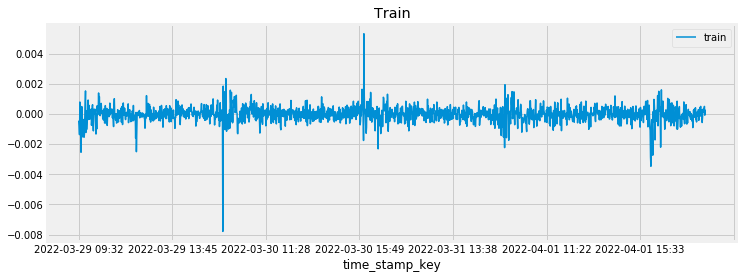

In [153]:
fig, ax = plt.subplots(figsize=(11, 4))
data_train['Close'].plot(ax=ax, label='train')
ax.set_title('Train')
ax.legend();

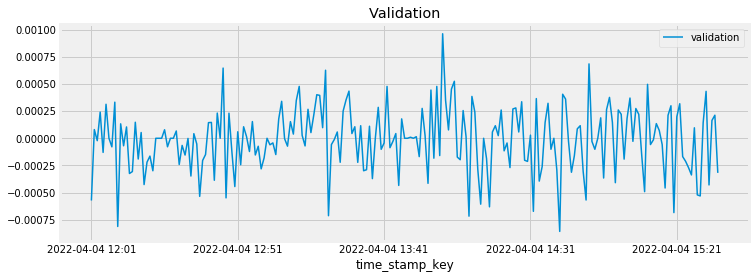

In [154]:
fig, ax = plt.subplots(figsize=(11, 4))
data_val['Close'].plot(ax=ax, label='validation')
ax.set_title('Validation')
ax.legend();

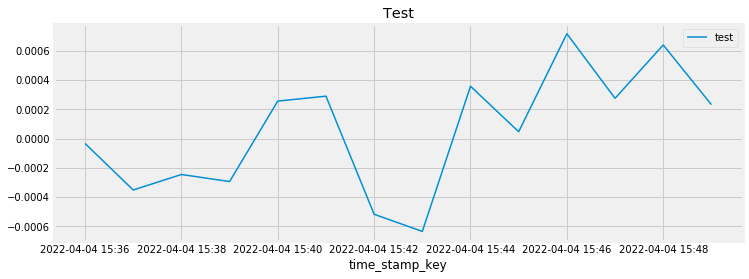

In [155]:
# Plot time series
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4))
data_test['Close'].plot(ax=ax, label='test')
ax.set_title('Test')
ax.legend();

In [ ]:
data = data.drop('time_stamp_key', axis=1)

In [135]:
# Interactive plot of time series
data.loc[:end_train, 'partition'] = 'train'
data.loc[end_train:end_validation, 'partition'] = 'validation'
data.loc[end_validation:, 'partition'] = 'test'

fig = px.line(
    data_frame = data.reset_index(),
    x      = data.index,
    y      = 'Close',
    color  = 'partition',
    title  = 'Number of users',
    width  = 900,
    height = 500
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

data=data.drop(columns='partition')

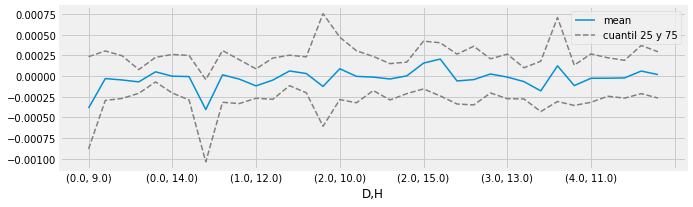

In [136]:
# Boxplot chart for daily "seasonality"
fig, ax = plt.subplots(figsize=(10, 3))
mean_day_hour = data.groupby(["D", "H"])["Close"].mean()
q25_dia_hora = data.groupby(["D", "H"])["Close"].quantile(0.25)
q75_dia_hora = data.groupby(["D", "H"])["Close"].quantile(0.75)

mean_day_hour.plot(ax=ax, label='mean')
q25_dia_hora.plot(ax=ax, linestyle='dashed', color='gray', label='')
q75_dia_hora.plot(ax=ax, linestyle='dashed', color='gray', label='cuantil 25 y 75')


ax.set(
)

ax.legend();

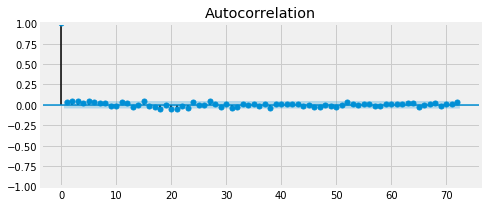

In [137]:
#Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(data['Close'], ax=ax, lags=72)
plt.show()

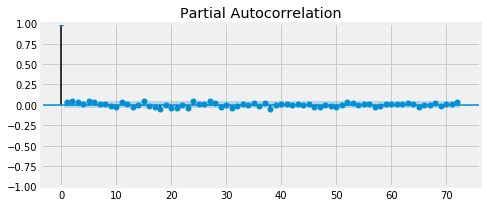

In [138]:
#Partial autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(data['Close'], ax=ax, lags=72, method='ywm')
plt.show()

In [220]:
#Creation of a forecaster
forecaster = ForecasterAutoreg(
                regressor = CatBoostRegressor(random_state=123, silent=True, l2_leaf_reg=1),
                lags = 25
                )

forecaster

ForecasterAutoreg 
Regressor: <catboost.core.CatBoostRegressor object at 0x7fea341a6a10> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
Window size: 25 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'l2_leaf_reg': 1, 'loss_function': 'RMSE', 'silent': True, 'random_state': 123} 
Creation date: 2022-04-05 15:21:48 
Last fit date: None 
Skforecast version: 0.4.3 

In [357]:
data['number'] = (list(range(1,len(data)+1)))
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close_SP500',
       'Close_raw_Close_SP500', 'D', 'M', 'H', 'lag_Close_raw_Close_SP500',
       'lag_Close_SP500', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'Negative', 'Positive', 'Neutral', 'number'],
      dtype='object')

In [230]:
#Let's set the hyperparameters
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.15]
    }

# Lags used as predictors
lags_grid = [1, 2, 3, 5, 10, 15, 20]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data.loc[:end_validation, 'Close'],
                        exog               = data[['D', 'H', 'lag_Close_raw_Close_SP500',
       'lag_Close_SP500', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'Negative', 'Positive', 'Neutral', 'number']].loc[:end_validation],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 14,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                        )

Number of models compared: 189


loop param_grid: 100%|████████████████████████████████████| 27/27 [02:17<00:00, 11.22s/it]


loop lags_grid: 100%|██████████████████████████████████████| 7/7 [12:22<00:00, 106.10s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
  Backtesting metric: 7.821055002181836e-08



In [231]:
results_grid.head(15)

,lags,params,metric,learning_rate,max_depth,n_estimators
118,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",7.821055e-08,0.10,1.0,300.0
127,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",7.862906e-08,0.15,1.0,300.0
116,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",7.886367e-08,0.01,10.0,500.0
115,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",7.900574e-08,0.01,10.0,300.0
117,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",7.905489e-08,0.10,1.0,100.0
113,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",7.912068e-08,0.01,5.0,500.0
156,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",7.926348e-08,0.15,5.0,100.0
167,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",7.947945e-08,0.01,5.0,500.0
155,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",7.954293e-08,0.15,1.0,500.0
128,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",7.961391e-08,0.15,1.0,500.0


In [232]:
#Backtesting
metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = data['Close'],
    initial_train_size = len(data.loc[:end_validation]),
    fixed_train_size   = False,
    steps      = 36,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False
    )

print(f"Backtest error: {metric}")

Backtest error: 1.6286195744920907e-07


In [233]:
predictions

,pred
10,-0.000044
11,-0.000044
12,-0.000028
13,-0.000015
14,-0.000035
15,-0.000023
16,-0.000026
17,-0.000059
18,-0.000023
19,-0.000029


In [234]:
importance = forecaster.get_feature_importance()
importance

,feature,importance
0,lag_1,9.652957
1,lag_2,2.559125
2,lag_3,1.379316
3,lag_4,2.578763
4,lag_5,3.469787
5,lag_6,1.718524
6,lag_7,0.499019
7,lag_8,2.027037
8,lag_9,2.971633
9,lag_10,2.234782


In [239]:
predictions = predictions.set_index((pd.DataFrame(data_test['Close']).index))

In [240]:
result = pd.concat([predictions, pd.DataFrame(data_test['Close'])], axis=1)

In [241]:
result

,pred,Close
time_stamp_key,,
2022-04-04 15:36,-0.000044,-0.000034
2022-04-04 15:37,-0.000044,-0.000352
2022-04-04 15:38,-0.000028,-0.000246
2022-04-04 15:39,-0.000015,-0.000295
2022-04-04 15:40,-0.000035,0.000256
2022-04-04 15:41,-0.000023,0.000290
2022-04-04 15:42,-0.000026,-0.000519
2022-04-04 15:43,-0.000059,-0.000636
2022-04-04 15:44,-0.000023,0.000358


In [243]:
fig = px.line(result, x=result.index, y="pred")
fig.show()

In [244]:
fig = px.line(result, y=result.columns[0:2], x=result.index)
fig.show()

In [347]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(y=result['Close'], x=result.index, name="real data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(y=result['pred'], x=result.index, name="predictions"),
    secondary_y=True,
)

fig.update_layout(
    title_text="BRK-A predictions"
)

fig.update_xaxes(title_text="minutes")

fig.update_yaxes(title_text="<b>real data</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>predictions</b>", secondary_y=True)

fig.show()